### PREGUNTAS

QUÉ LE OFREZCO A MI PÚBLICO OBJETIVO

- seleccionar rol: Data Analist, Business Analist

- con qué trabajan esos roles: herramientas de visualizacion, de graficas, notebooks, bases de datos relacionales y no relacionales, lenguajes de programación.

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable

In [48]:
df_adalab_limpio = pd.read_csv('data/df_adalab_limpio.csv', index_col = 'index')
df_notebooks = pd.read_csv('data/df_notebooks.csv', index_col = 'index')
df_languages = pd.read_csv('data/df_languages.csv', index_col = 'index')
df_learn = pd.read_csv('data/df_learn.csv', index_col = 'index')
df_viz = pd.read_csv('data/df_viz.csv', index_col = 'index')
df_share = pd.read_csv('data/df_share.csv', index_col = 'index')
df_code_env = pd.read_csv('data/df_code_env.csv', index_col = 'index')
df_courses = pd.read_csv('data/df_courses.csv', index_col = 'index')
df_da_publi = pd.read_csv('data/df_da_publi.csv', index_col = 'index')

In [3]:
lista_df = [df_languages, df_viz, df_code_env, df_notebooks, df_share, df_learn, df_courses]
lista_titulos = ["Lenguajes de programación", "Librerías de visualización", "Ambientes de Desarrollo de Código", "Productos de Alojamiento de Notebooks", "Plataformas para compartir proyectos", "Productos de Big Data medio plazo", "Plataformas de formación"]

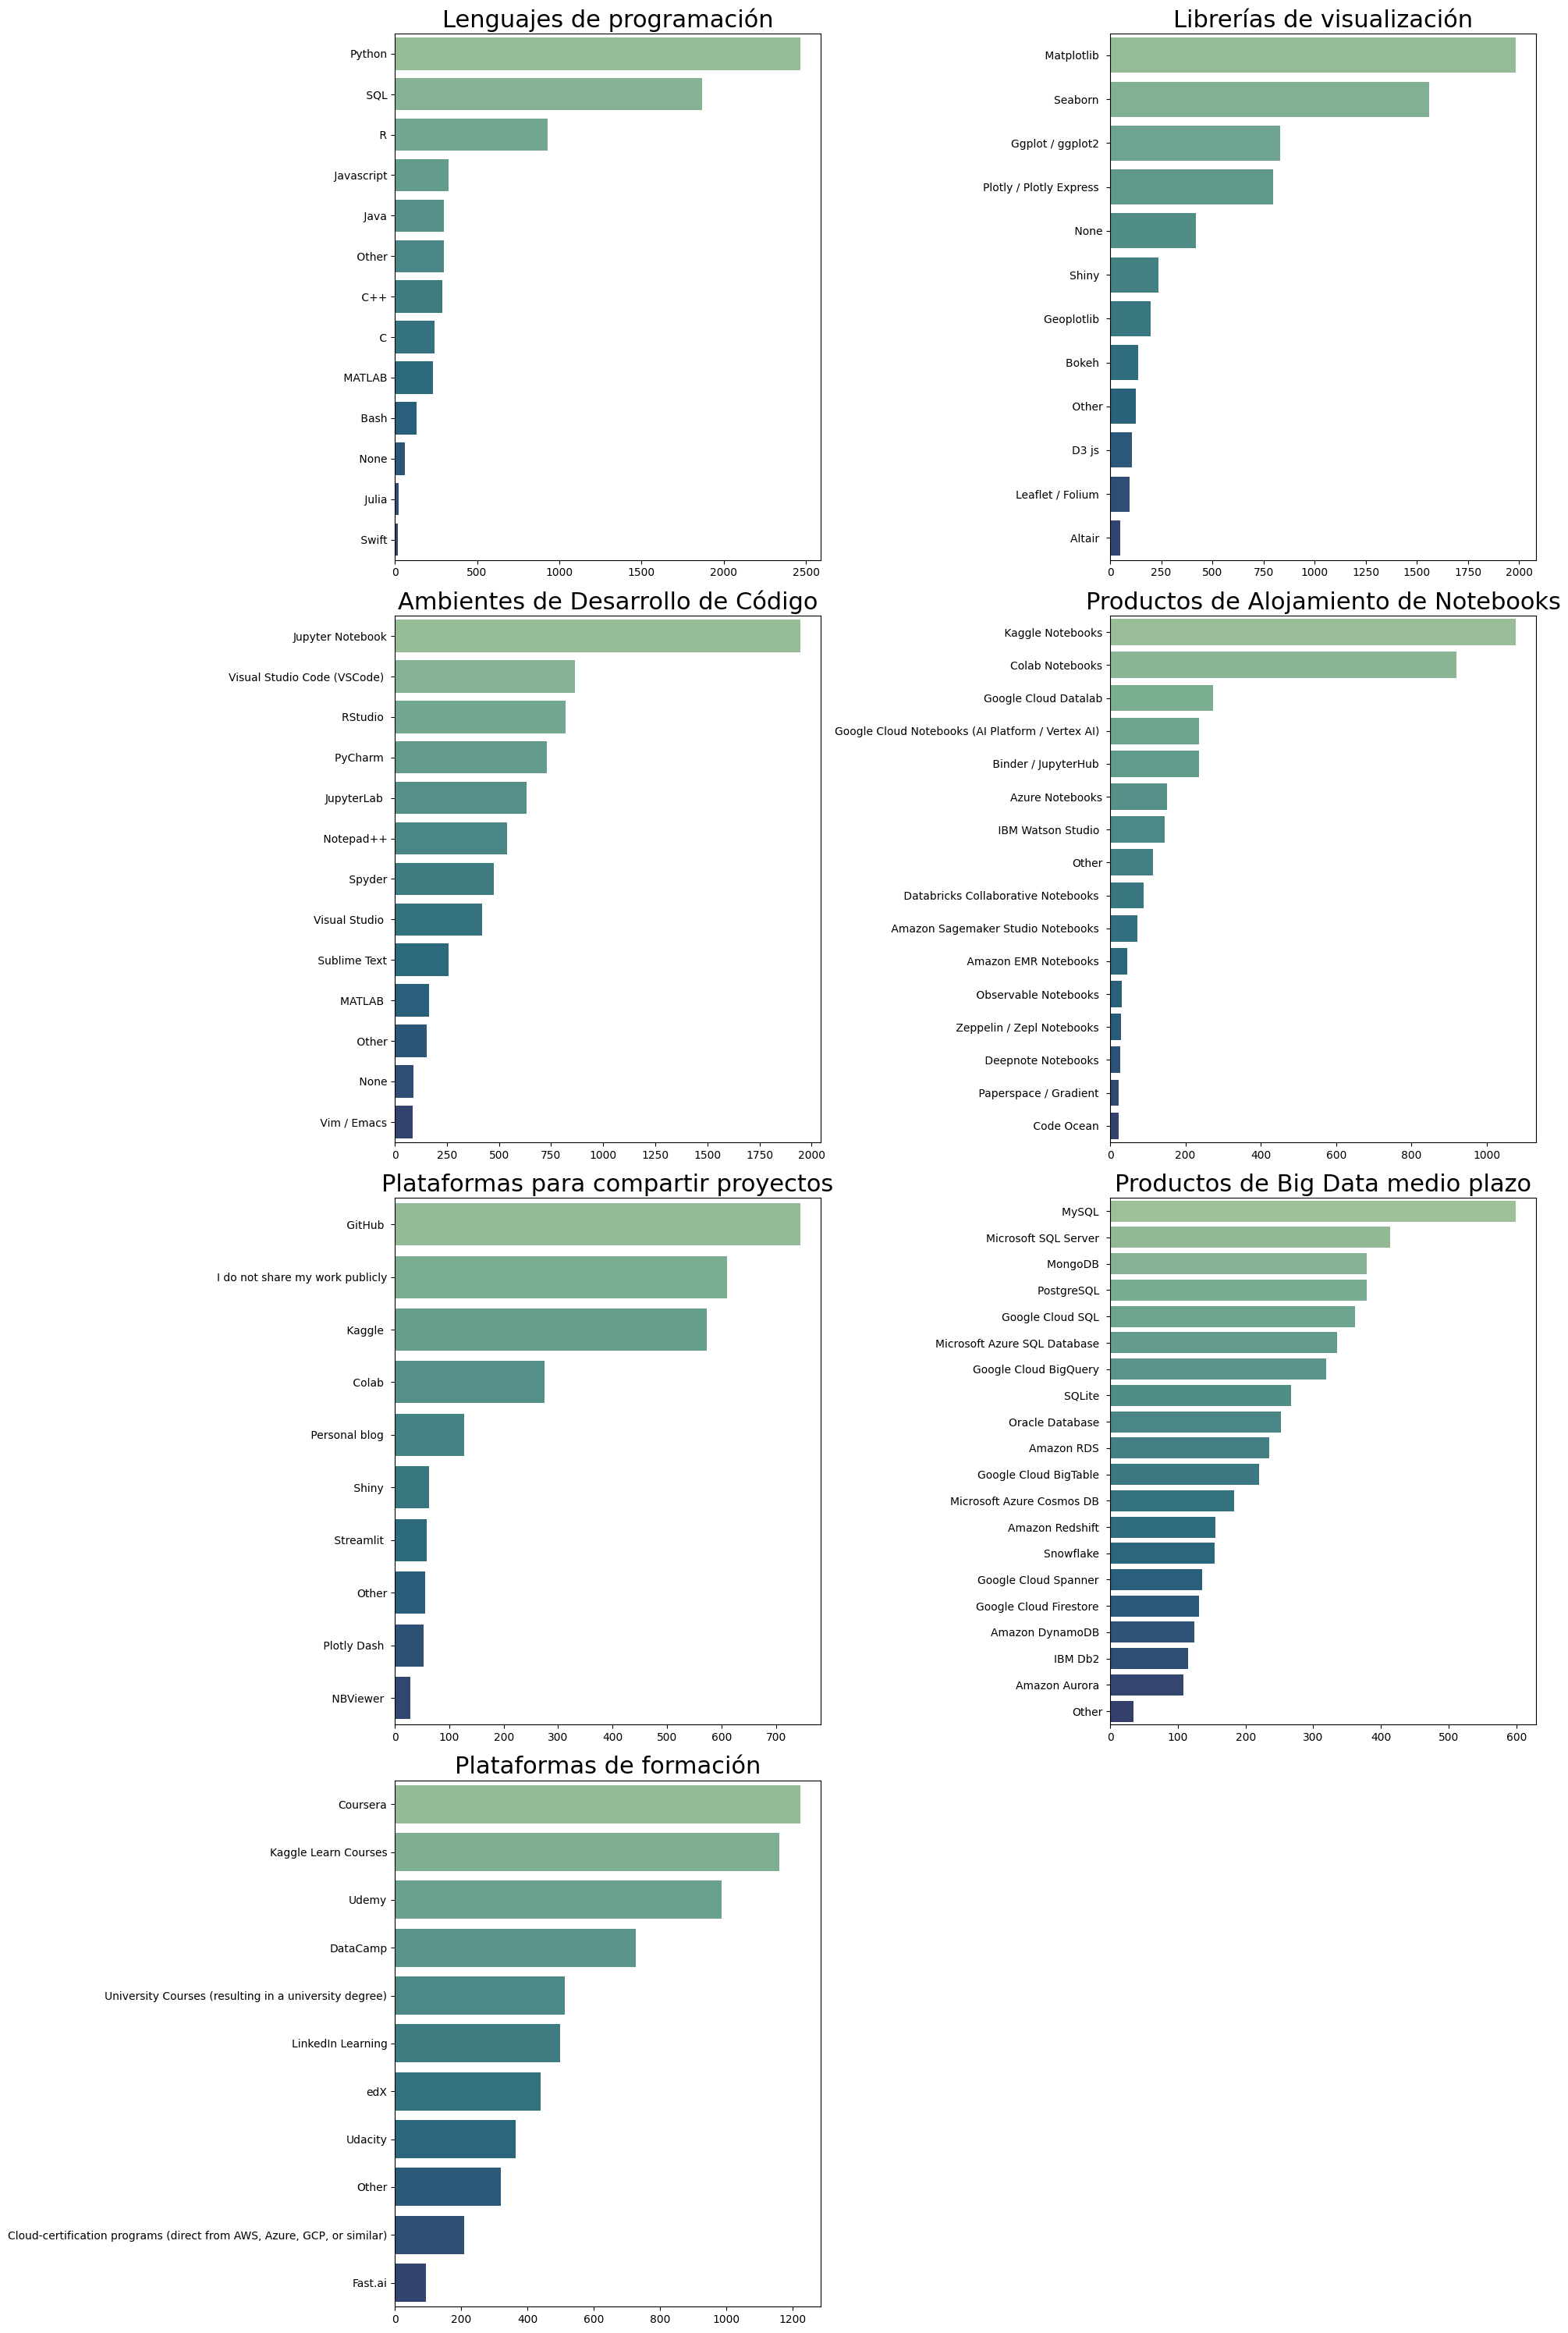

In [10]:
fig, axes = plt.subplots (4, 2, figsize = (20, 30))

axes = axes.flat 

for indice, df in enumerate(lista_df):
    columna = df.columns[-1]
    orden = df[columna].value_counts().index #sacamos el índice de las columnas, ordenando sus valores de mayor a menor 
    sns.countplot( y = columna, data = df, order = orden, ax = axes[indice], palette= "crest") 
    for ind, titulo in enumerate (lista_titulos):
        axes[ind].set_title(titulo, size= 22)
        axes[ind].set(xlabel= '', ylabel = '')

plt.tight_layout()
fig.delaxes(axes[-1]);

CÓMO LLEGO A MI PÚBLICO OBJETIVO
- ¿Hay poco porcentaje de mujeres en el sector tecnológico? ¿Esto está relacionado con el país que analizamos (global, europero, español)? **Resuelto con gráfica
- Salario de Data analist y Bussines Analyst (en función de la experiencia). Brecha de género.
- Analizar el nivel de estudios y el sector del que vienen las mujeres que trabajan en DA o BA.

In [12]:
df_publicidad = pd.read_csv('data/df_publicidad.csv')

df_publicidad.head(2)

,index,age,gender,country,education,role,prog_language,code_env,notebook_kaggle,notebook_colab,...,media_Reddit,media_Kaggle,media_Forums,media_YouTube,media_Podcasts,media_Blogs,media_Journal,media_Slack,media_OTHER,cat_experience
0,8,22-24,Man,Russia,Bachelor’s degree,Currently not employed,"Python, SQL",Other,Kaggle Notebooks,Colab Notebooks,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,Mid
1,35,30-34,Woman,Brazil,Bachelor’s degree,Currently not employed,"Python, R, SQL","JupyterLab ,RStudio ,PyCharm ,Jupyter Notebook",Kaggle Notebooks,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Junior


In [13]:
col_media = ['media_Twitter', 'media_Email', 'media_Reddit', 'media_Kaggle', 'media_Forums', 'media_YouTube', 'media_Podcasts', 'media_Blogs', 'media_Journal', 'media_Slack', 'media_OTHER']

In [15]:
def unir(col):
    lista_valores = []
    for element in col:
        if str(element) != "nan":
            lista_valores.append(str(element))
        else:
            pass
    return lista_valores

In [16]:
df_publicidad['media_unido'] = df_publicidad[col_media].apply(unir, axis=1)

In [21]:
sociodemo_media = df_publicidad[["gender", "country", "education", "role", "media_unido"]]
df_media = sociodemo_media.explode(["media_unido"])
df_media.sample(2)

,gender,country,education,role,media_unido
1331,Man,Germany,Master’s degree,Other,"Kaggle (notebooks, forums, etc)"
1205,Man,Netherlands,Doctoral degree,Other,"YouTube (Kaggle YouTube, Cloud AI Adventures, ..."


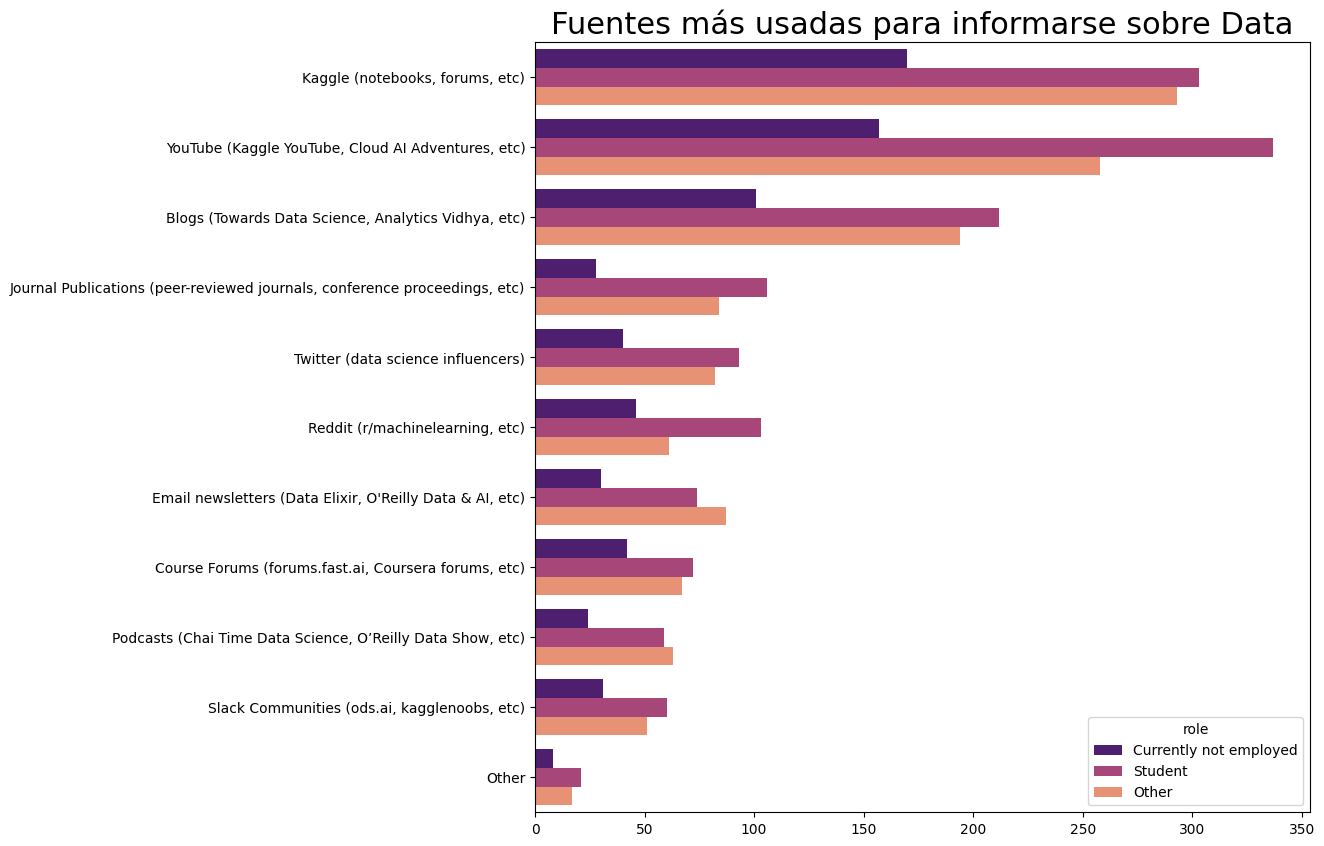

In [35]:
orden = df_media["media_unido"].value_counts().index

plt.figure(figsize = (10, 10))
sns.countplot(y = "media_unido", hue = "role", data = df_media, order = orden, palette= "magma")
plt.title("Fuentes más usadas para informarse sobre Data", size= 22)
plt.xlabel("")
plt.ylabel("");

In [36]:
df_media.sample(2)

,gender,country,education,role,media_unido
1408,Man,Brazil,I prefer not to answer,Other,"Kaggle (notebooks, forums, etc)"
1368,Man,Colombia,Some college/university study without earning ...,Student,NaN


In [49]:
df_genero = df_da_publi['gender'].value_counts().reset_index()
df_genero

,gender,count
0,Man,605
1,Woman,121
2,Prefer not to say,4
3,Prefer to self-describe,2


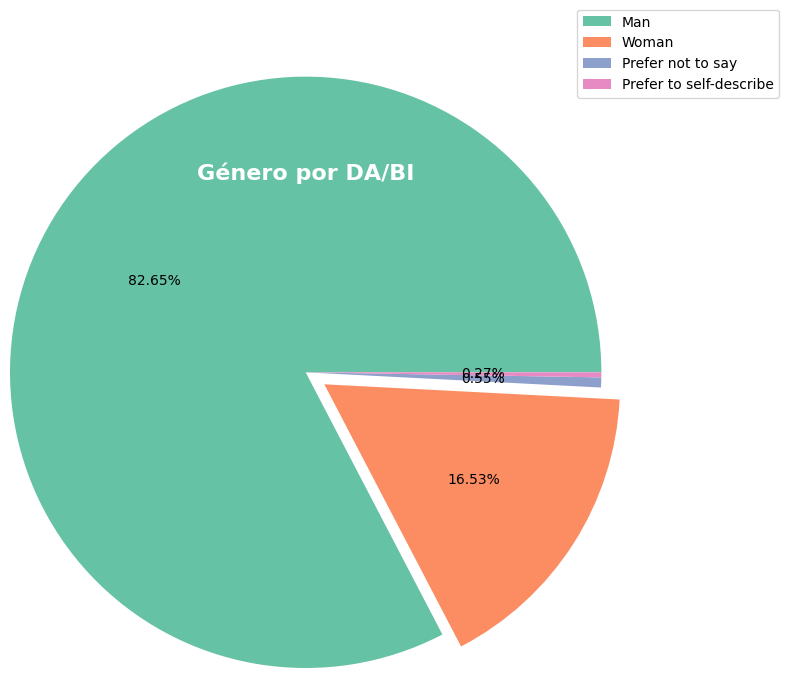

In [63]:
data = [605, 121, 4, 2]
keys = ["Man", "Woman", "Prefer not to say", "Prefer to self-describe"]
explode = (0, 0.15, 0, 0)
palette_color = sns.color_palette("Set2")


plt.pie(data, explode = explode,  colors =  palette_color, radius = 2, autopct='%1.2f%%');
plt.title("Género por DA/BI", color = "white", fontsize = 16, fontweight = "bold") 
plt.legend(bbox_to_anchor=(1.8, 1.5), labels = keys)
plt.show();
